In [1]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load the wine dataset
data = load_wine()

# Split the dataset into inputs and targets
inputs = data.data
targets = data.target

# Apply PCA for dimension reduction
pca = PCA(n_components=2)
inputs_reduced = pca.fit_transform(inputs)

# Split the dataset into training and testing sets
inputs_train_reduced, inputs_test_reduced, targets_train_red, targets_test_red = train_test_split(inputs_reduced, targets, test_size=0.3, random_state=22)


In [3]:
# Random forest classifier with PCA
rfc_pca = RandomForestClassifier()
rfc_pca.fit(inputs_train_reduced, targets_train_red)
predictions_rfc_pca = rfc_pca.predict(inputs_test_reduced)
accuracy_rfc_pca = accuracy_score(targets_test_red, predictions_rfc_pca)
print(f"Random forest accuracy with PCA: {accuracy_rfc_pca}")

Random forest accuracy with PCA: 0.7037037037037037


In [4]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'Confusion Matrix')

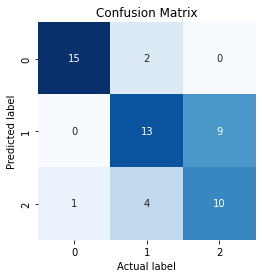

In [7]:
rf_cm = confusion_matrix(targets_test_red, predictions_rfc_pca)
rf_cm_plt=sns.heatmap(rf_cm.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")

In [8]:
# Print classification report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(targets_test_red, predictions_rfc_pca, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.88      0.94      0.91        16
     class 1       0.59      0.68      0.63        19
     class 2       0.67      0.53      0.59        19

    accuracy                           0.70        54
   macro avg       0.71      0.72      0.71        54
weighted avg       0.70      0.70      0.70        54

